# Ascaso-Extended Models Calibration


---
**License**

 Ascaso_Extended_Calibration

 Tue Aug 24 10:30:00 2021\
 Copyright  2021\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---

 Ascaso_Extended_Calibration\
 Copyright (C) 2021 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Packages

In [1]:
import sys
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/")
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/Ascaso_Extended_Calibration")

#NumCosmo
from numcosmo_py import Ncm, Nc, GObject
Ncm.cfg_init()
Ncm.cfg_set_log_handler(lambda msg: sys.stdout.write(msg) and sys.stdout.flush())

#Calibration functions
from AEC_data_binning import BinnedData as BData
from AEC_calibration import RichnessMassRelationCalibration as RMRC
from AEC_Plot import cplot
from AEC_corrected_moments import expected_value, standard_deviation

#Useful packages
import numpy as np
from astropy.io import fits
from astropy.table import Table

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Data

### NumCosmo's Matching By Proximity

Data from `cosmoDC2_v1.1.4_image` and `cosmoDC2_v1.1.4_redmapper_v0.8.1` catalogs matched by proximity . See [matching_by_proximity.ipynb](https://github.com/NumCosmo/NumCosmo/blob/ascaso_interface/notebooks/richness_proxy/CatalogsMatching/matching_by_proximity.ipynb)

In [2]:
DC2_rM_mdata = Table.read('CatalogsMatching/match_proximity.fits')
DC2_rM_mdata.rename_column('R', 'richness')
DC2_rM_mdata.rename_column('R_err', 'richness_err')
DC2_rM_mdata.rename_column('z', 'redshift')

### Matching by ID 

Data from `cosmoDC2_v1.1.4_image` and `cosmoDC2_v1.1.4_redmapper_v0.8.1` catalogs matched by ID . See [matching_by_ID.ipynb](https://github.com/NumCosmo/NumCosmo/blob/ascaso_interface/notebooks/richness_proxy/CatalogsMatching/matching_by_ID.ipynb)

In [3]:
# DC2_rM_mdata = Table.read('CatalogsMatching/match_ID.fits')
# DC2_rM_mdata.rename_column('halo_mass', 'mass')

## Fit

In [4]:
richness_cut = 5.0
rmc = RMRC(DC2_rM_mdata, richness_cut)

### Linear

Here we do the fitting of linear model parameters. The model is:

\begin{equation}
    \left< \ln R | M, z \right> = \mu_0 + \mu_1 \ln\left( \frac{M}{M_0} \right) +  \mu_2\ln\left(\frac{1 + z}{1 + z_0}\right);
\end{equation}

$$\textbf{p}_{1} = \{\mu_0, \mu_1, \mu_2, \sigma_0, \sigma_1, \sigma_2\}. $$

$\textbf{p}_{1}$ is the vector with the linear model parameters.


In [5]:
ascaso, fit_ascaso, dmr_asc = rmc.run_fit('ascaso')

#----------------------------------------------------------------------------------
# Data used:
#   - NcDataClusterMassRich
#----------------------------------------------------------------------------------
# Model[09000]:
#   - NcClusterMass : Ascaso Ln-normal richness distribution
#----------------------------------------------------------------------------------
# Model parameters
#   -    mup0[00]:  3.19                [FREE]
#   -    mup1[01]:  0.868588963806504   [FREE]
#   -    mup2[02]: -0.304006137332276   [FREE]
#   - sigmap0[03]:  0.33                [FREE]
#   - sigmap1[04]: -0.0347435585522601  [FREE]
#   - sigmap2[05]:  0                   [FREE]
#   -     cut[06]:  1.6094379124341     [FIXED]
#----------------------------------------------------------------------------------
# Model fitting. Interating using:
#  - solver:            NLOpt:ln-neldermead
#  - differentiation:   Numerical differentiantion (central)
#........................................................

In [6]:
lnR_mean_ascaso = rmc.get_mean_model(ascaso,  np.log(DC2_rM_mdata["mass"]),  DC2_rM_mdata["redshift"])
lnR_std_ascaso = rmc.get_std_model(ascaso,  np.log(DC2_rM_mdata["mass"]),  DC2_rM_mdata["redshift"])

### Quadratic
Here we do the fitting of quadratic model parameters. The model is:

\begin{equation}
\begin{split}
    \left<\ln R | M, z \right> = \mu_0 + 
    \mu_{M1} \ln\left( \frac{M}{M_0} \right) +
    \mu_{M2} (\ln\left(\frac{M}{M_0} \right))^2 +\\
    + \mu_{z1} \ln\left(\frac{1 + z}{1 + z_0}\right) +
    \mu_{z2} (\ln\left(\frac{1 + z}{1 + z_0}\right))^2 +\\
    + \mu_{Mz} \ln\left(\frac{1 + z}{1 + z_0}\right)\ln\left(\frac{M}{M_0} \right);
\end{split}
\end{equation}

$$\textbf{p}_{2} = \{\mu_0, \mu_{M1}, \mu_{M2}, \mu_{Z1}, \mu_{Z2}, \mu_{MZ}, \sigma_0, \sigma_{M1}, \sigma_{M2}, \sigma_{Z1}, \sigma_{Z2}, \sigma_{MZ} \}.$$

$\textbf{p}_{2}$ is the vector with the quadratic model parameters.


In [7]:
ext_ln1pz, fit_ext, dmr_ext = rmc.run_fit('ext_ln1pz')

#----------------------------------------------------------------------------------
# Data used:
#   - NcDataClusterMassRich
#----------------------------------------------------------------------------------
# Model[09000]:
#   - NcClusterMass : LnrichExt Ln-normal richness distribution
#----------------------------------------------------------------------------------
# Model parameters
#   -      mu[00]:  3.19                [FREE]
#   -    muM1[01]:  0.868588963806504   [FREE]
#   -    muZ1[02]: -0.304006137332276   [FREE]
#   -    muM2[03]:  0                   [FREE]
#   -    muZ2[04]:  0                   [FREE]
#   -    muMZ[05]:  0                   [FREE]
#   -  sigma0[06]:  0.33                [FREE]
#   - sigmaM1[07]: -0.0347435585522601  [FREE]
#   - sigmaZ1[08]:  0                   [FREE]
#   - sigmaM2[09]:  0                   [FREE]
#   - sigmaZ2[10]:  0                   [FREE]
#   - sigmaMZ[11]:  0                   [FREE]
#   -      A0[12]:  0                   [FIX

In [8]:
lnR_mean_ext_ln1pz = rmc.get_mean_model(ext_ln1pz,  np.log(DC2_rM_mdata["mass"]),  DC2_rM_mdata["redshift"])
lnR_std_ext_ln1pz = rmc.get_std_model(ext_ln1pz,  np.log(DC2_rM_mdata["mass"]),  DC2_rM_mdata["redshift"])

## Corrected Moments

In [9]:
lnR_mean_ext_ln1pz_corrected = expected_value(lnR_mean_ext_ln1pz, lnR_std_ext_ln1pz, richness_cut)
lnR_std_ext_ln1pz_corrected = standard_deviation(lnR_mean_ext_ln1pz, lnR_std_ext_ln1pz, richness_cut)

lnR_mean_ascaso_corrected = expected_value(lnR_mean_ascaso, lnR_std_ascaso, richness_cut)
lnR_std_ascaso_corrected = standard_deviation(lnR_mean_ascaso, lnR_std_ascaso, richness_cut)

## Model Plots

### Binned data

In [10]:
bd = BData(DC2_rM_mdata, 0.05, 0.05)
binned_mean = bd.get_bins_mean()
binned_std = bd.get_bins_std()

### Mean

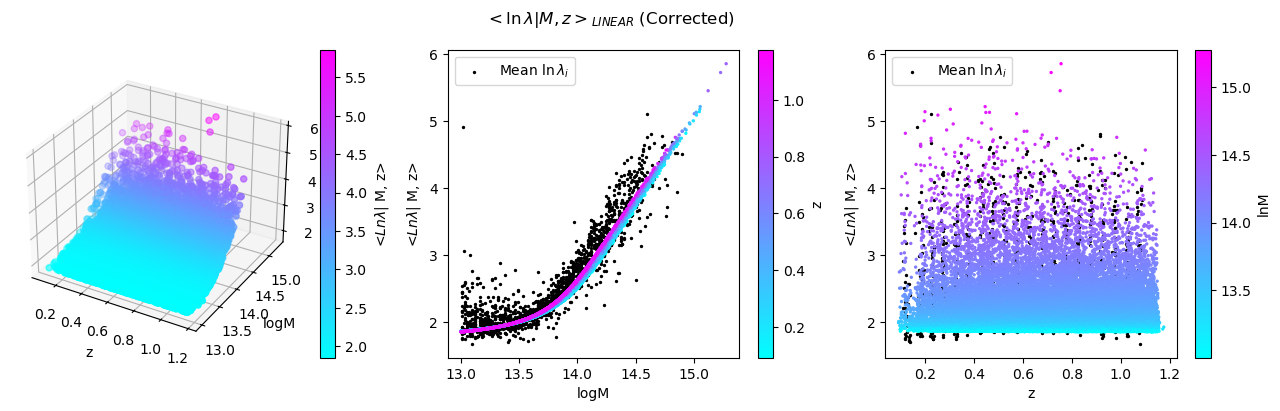

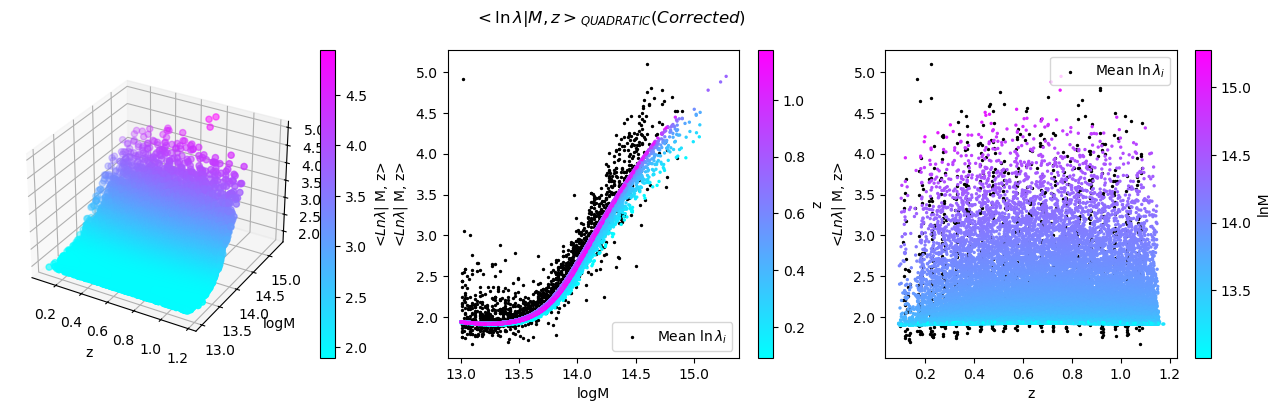

In [11]:
# cplot(lnR_mean_ascaso, 'lnR_mean_ascaso', DC2_rM_mdata, binned_mean, binned_std) #Ascaso
cplot(lnR_mean_ascaso_corrected, 'lnR_mean_ascaso_c', DC2_rM_mdata, binned_mean, binned_std) #Ascaso corrected
# cplot(lnR_mean_ext_ln1pz, 'lnR_mean_ext_ln1pz', DC2_rM_mdata, binned_mean, binned_std) #Extended 
cplot(lnR_mean_ext_ln1pz_corrected, 'lnR_mean_ext_ln1pz_c', DC2_rM_mdata, binned_mean, binned_std) #Extended corrected
plt.show()

### Standard deviation

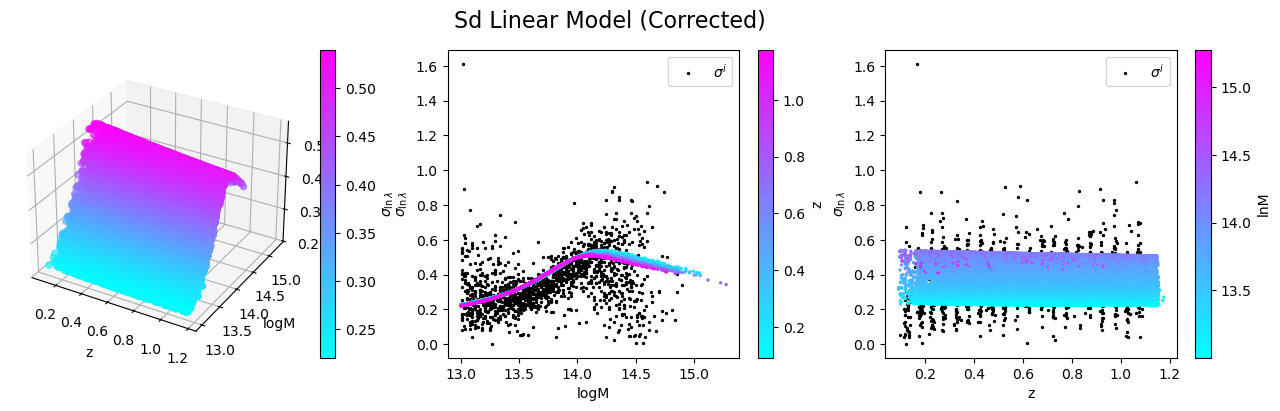

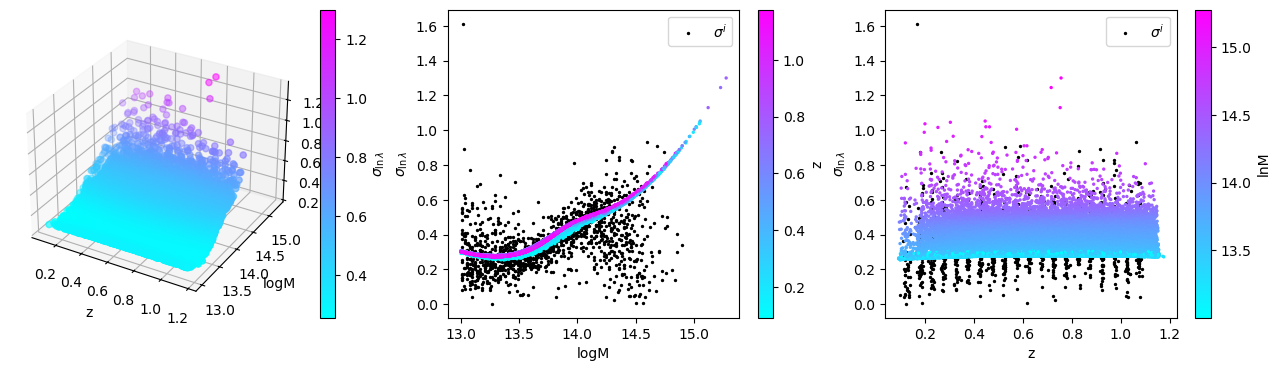

In [12]:
# cplot(lnR_std_ascaso, 'lnR_std_ascaso', DC2_rM_mdata, binned_mean, binned_std, option = "std") #Ascaso
cplot(lnR_std_ascaso_corrected, 'lnR_std_ascaso_c', DC2_rM_mdata, binned_mean, binned_std, option = "std") #Ascaso corrected
# cplot(lnR_std_ext_ln1pz, 'lnR_std_ext_ln1pz', DC2_rM_mdata, binned_mean, binned_std, option = "std") #Extended  
cplot(lnR_std_ext_ln1pz_corrected, 'lnR_std_ext_ln1pz_c', DC2_rM_mdata, binned_mean, binned_std, option = "std") #Extended corrected
plt.show()